In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
cities = pd.read_csv('GlobalLandTemperaturesByCity.csv', parse_dates=True, squeeze=True)

In [3]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [4]:
cities.shape

(8599212, 7)

In [5]:
usa = cities[cities['Country'] == 'United States']

In [6]:
usa.shape

(687289, 7)

In [7]:
data = ['Alexandria', 'Albuquerque', 'Abilene']

In [8]:
data2 = usa[usa['City'].isin(data)]

In [9]:
data2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W


In [10]:
data2 = data2[['dt', 'AverageTemperature']]

In [11]:
data2.head()

,dt,AverageTemperature
47555,1820-01-01,2.101
47556,1820-02-01,6.926
47557,1820-03-01,10.767
47558,1820-04-01,17.989
47559,1820-05-01,21.809


In [12]:
data2.columns = ['Date', 'Temp']

In [13]:
data2.head()

,Date,Temp
47555,1820-01-01,2.101
47556,1820-02-01,6.926
47557,1820-03-01,10.767
47558,1820-04-01,17.989
47559,1820-05-01,21.809


In [14]:
data2['Date'] = pd.to_datetime(data2['Date'])

In [15]:
data2.head()

,Date,Temp
47555,1820-01-01,2.101
47556,1820-02-01,6.926
47557,1820-03-01,10.767
47558,1820-04-01,17.989
47559,1820-05-01,21.809


In [16]:
data2.isna().sum()

Date      0
Temp    150
dtype: int64

In [17]:
data2.shape

(7889, 2)

In [18]:
data2.set_index('Date', inplace=True)

In [19]:
data2.shape

(7889, 1)

In [20]:
data2 = data2.bfill()

In [21]:
data2.tail()

,Temp
Date,
2013-05-01,17.134
2013-06-01,22.919
2013-07-01,25.658
2013-08-01,22.722
2013-09-01,19.643


In [22]:
data2.head()

,Temp
Date,
1820-01-01,2.101
1820-02-01,6.926
1820-03-01,10.767
1820-04-01,17.989
1820-05-01,21.809


In [23]:
data2.isna().sum()

Temp    0
dtype: int64

In [24]:
data2 = data2['2003':'2013']

<AxesSubplot:xlabel='Date', ylabel='Temp'>

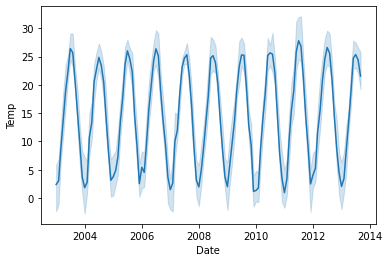

In [25]:
sns.lineplot(x=data2.index, y=data2['Temp'])

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
test_result = adfuller(data2['Temp'])

In [28]:
test_result

(-1.6309874258195747,
 0.46697389736623907,
 15,
 371,
 {'1%': -3.4480996560263386,
  '5%': -2.8693621113224137,
  '10%': -2.570937038891028},
 1715.2932559672986)

In [29]:
def adfuller_test(Temp):
    result = adfuller(Temp)
    labels = ['ADF Test Statistics', 'p-value', 'flags used', 'Number of observations used']
    for value, label in zip(result, labels):
        print(label+' : '+ str(value))
    if result[1] < 0.05:
        print('Data is STATIONARY and has no unit root')
    else:
        print('Data is NON-STATIONARY and has no unit root')

In [30]:
adfuller_test(data2['Temp'])

ADF Test Statistics : -1.6309874258195747
p-value : 0.46697389736623907
flags used : 15
Number of observations used : 371
Data is NON-STATIONARY and has no unit root


In [31]:
df = data2.copy()

In [32]:
df.head()

,Temp
Date,
2003-01-01,5.915
2003-02-01,6.792
2003-03-01,12.565
2003-04-01,18.641
2003-05-01,23.421


In [33]:
df['first_temp_diff'] = df['Temp'] - df['Temp'].shift(12)

In [34]:
df.head(15)

,Temp,first_temp_diff
Date,,
2003-01-01,5.915,NaN
2003-02-01,6.792,NaN
2003-03-01,12.565,NaN
2003-04-01,18.641,NaN
2003-05-01,23.421,NaN
2003-06-01,25.201,NaN
2003-07-01,29.061,NaN
2003-08-01,29.062,NaN
2003-09-01,22.886,NaN


In [35]:
adfuller_test(df['first_temp_diff'][12:]) # FIRST WAY to drop NANs

ADF Test Statistics : -5.203540315567304
p-value : 8.646934084981325e-06
flags used : 12
Number of observations used : 362
Data is STATIONARY and has no unit root


In [36]:
adfuller_test(df['first_temp_diff'].dropna()) # SECOND WAY to drop NANs

ADF Test Statistics : -5.203540315567304
p-value : 8.646934084981325e-06
flags used : 12
Number of observations used : 362
Data is STATIONARY and has no unit root


<AxesSubplot:xlabel='Date', ylabel='first_temp_diff'>

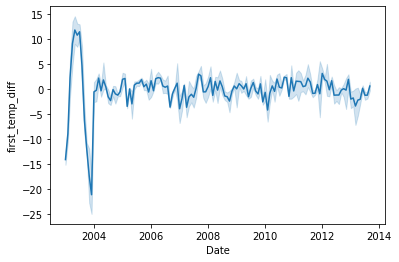

In [36]:
sns.lineplot(x=df.index, y=df['first_temp_diff'])

<AxesSubplot:xlabel='Date'>

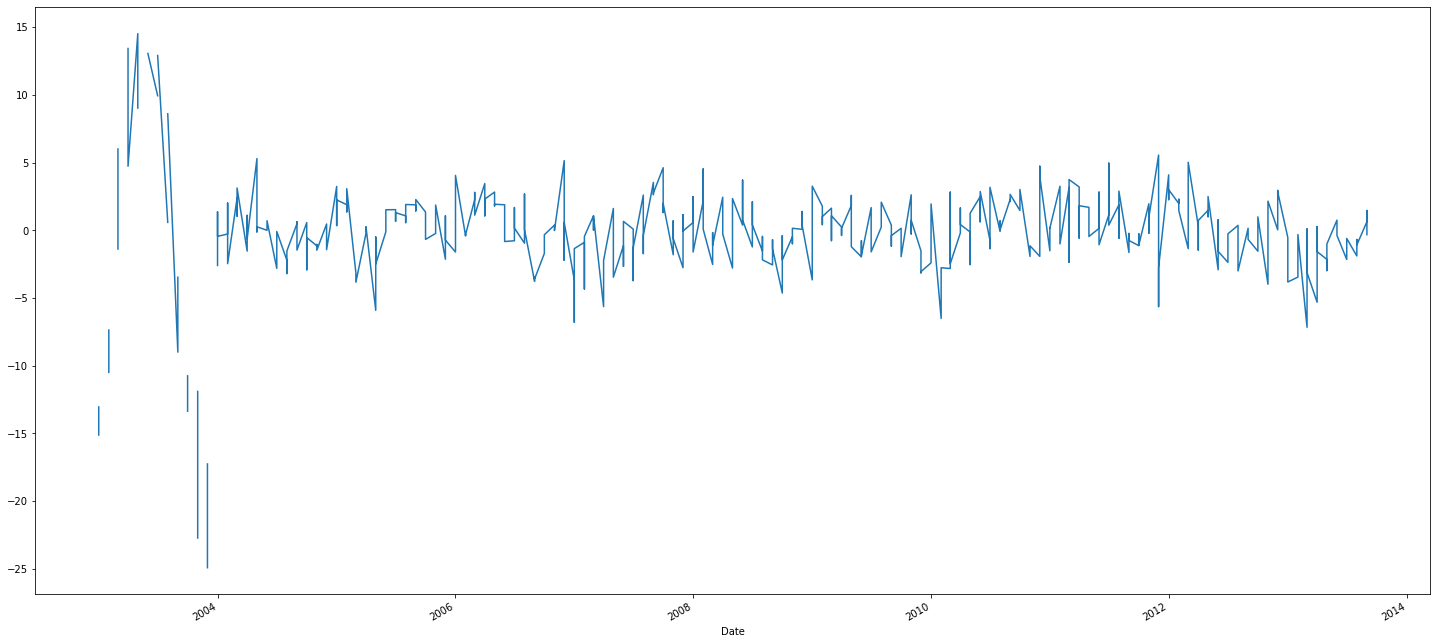

In [37]:
df['first_temp_diff'].plot(figsize=(25, 12))

In [37]:
data2['month'] = data2.index.month

In [38]:
data2['year'] = data2.index.year

In [39]:
data2.head()

,Temp,month,year
Date,,,
1820-01-01,2.101,1,1820
1820-02-01,6.926,2,1820
1820-03-01,10.767,3,1820
1820-04-01,17.989,4,1820
1820-05-01,21.809,5,1820


In [40]:
pivot = data2.pivot_table(values='Temp', index='month', columns='year')

In [41]:
pivot

year,1743,1744,1745,1746,1747,1748,1749,1750,1751,1752,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,12.606,0.290,-1.08,-1.08,-1.08,-1.08,-1.080,-0.595,-4.318,...,1.845667,3.786667,5.441667,1.497667,1.979000,2.012667,1.346333,0.958000,4.072667,2.060333
2,NaN,12.606,0.542,-1.08,-1.08,-1.08,-1.08,0.668,0.812,6.402,...,2.787667,4.890000,4.543333,2.648333,4.904667,5.972667,1.775333,3.341000,5.251000,3.460000
3,NaN,12.606,4.289,-1.08,-1.08,-1.08,-1.08,5.836,6.314,6.402,...,10.725667,7.260667,9.316000,10.027667,8.753333,9.397667,8.570667,10.084667,11.659333,8.260667
4,NaN,12.606,10.864,-1.08,-1.08,-1.08,-1.08,11.472,10.699,10.181,...,13.349667,13.361667,15.631333,11.989667,13.505333,13.504000,14.126333,15.602667,15.453333,13.244333
5,NaN,17.740,-1.080,-1.08,-1.08,-1.08,-1.08,17.693,22.767,11.431,...,20.574667,17.604333,19.782333,18.217333,17.992333,19.051667,18.581667,19.054333,20.707000,18.656333
6,NaN,23.043,-1.080,-1.08,-1.08,-1.08,-1.08,21.195,22.767,11.431,...,22.806667,23.584667,24.174667,23.126333,24.738667,23.199333,25.189667,25.817667,24.583000,24.722667
7,NaN,24.148,-1.080,-1.08,-1.08,-1.08,-1.08,26.156,24.711,11.431,...,24.849667,26.008667,26.362667,24.722000,25.146667,25.280667,25.636000,27.791333,26.588667,25.343333
8,NaN,17.193,-1.080,-1.08,-1.08,-1.08,-1.08,24.176,23.627,11.431,...,23.378333,24.552667,25.144000,25.311000,23.915333,25.223333,25.430000,26.820667,25.617333,24.394000
9,NaN,17.193,-1.080,-1.08,-1.08,-1.08,-1.08,19.360,17.887,11.431,...,20.435667,22.292000,18.674000,21.647333,20.108667,19.709667,22.062000,21.183000,20.960667,21.547000


Text(0, 0.5, 'Temperature')

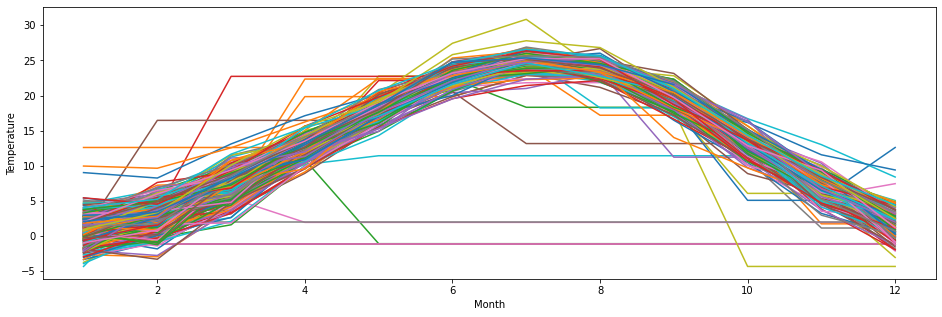

In [45]:
pivot.plot(figsize=(16,5))
plt.legend().remove()
plt.xlabel('Month')
plt.ylabel('Temperature')

In [38]:
monthly_seasonality = pivot.mean(axis=1)

NameError: name 'pivot' is not defined

In [39]:
monthly_seasonality.plot(figsize=(16,5))

NameError: name 'monthly_seasonality' is not defined

In [40]:
df = df[['first_temp_diff']].bfill()

In [41]:
df.head()

,first_temp_diff
Date,
2003-01-01,1.362
2003-02-01,1.362
2003-03-01,1.362
2003-04-01,1.362
2003-05-01,1.362


In [42]:
df['first_temp_diff'].rolling(window=5).mean()

Date
2003-01-01       NaN
2003-02-01       NaN
2003-03-01       NaN
2003-04-01       NaN
2003-05-01    1.3620
               ...  
2013-05-01   -2.7764
2013-06-01   -2.5192
2013-07-01   -2.0214
2013-08-01   -0.9678
2013-09-01   -1.0870
Name: first_temp_diff, Length: 387, dtype: float64

In [43]:
value = pd.DataFrame(data2['Temp'])

In [44]:
temp_df = pd.concat([value, data2['Temp'].rolling(window=5).mean()], axis=1)

In [45]:
temp_df.columns = ['actual_temp', 'predicted_temp']

In [46]:
temp_df.head()

,actual_temp,predicted_temp
Date,,
2003-01-01,5.915,NaN
2003-02-01,6.792,NaN
2003-03-01,12.565,NaN
2003-04-01,18.641,NaN
2003-05-01,23.421,13.4668


In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
rmse = np.sqrt(mean_squared_error(temp_df['predicted_temp'][4:], temp_df['actual_temp'][4:]))

In [49]:
rmse

7.736356172992859

In [58]:
#ARIMA

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [52]:
df.head()

,first_temp_diff
Date,
2003-01-01,1.362
2003-02-01,1.362
2003-03-01,1.362
2003-04-01,1.362
2003-05-01,1.362


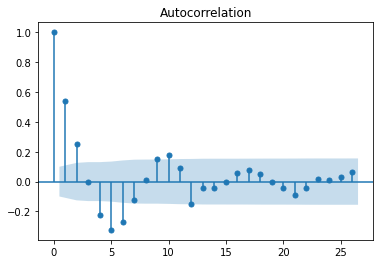

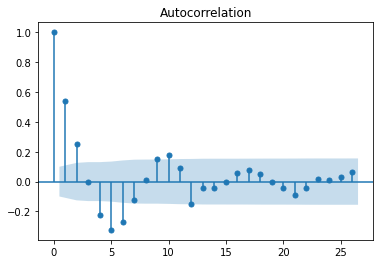

In [53]:
plot_acf(df['first_temp_diff'])

In [54]:
#from graph we can see that q value that is nearer to the boundary is 7

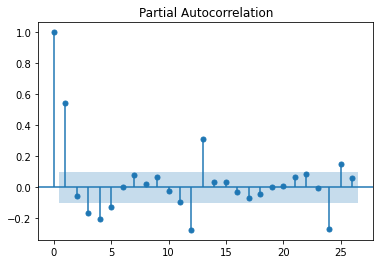

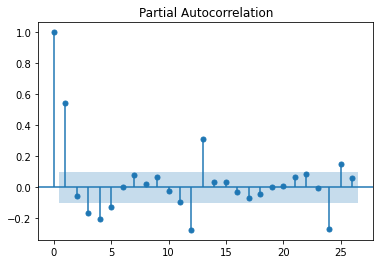

In [55]:
plot_pacf(df['first_temp_diff'])

In [56]:
#from this graph we can see that p value we can take for ARIMA as q value is 2

In [58]:
df.shape

(387, 1)

In [60]:
training_data = df[0:300]
test_data = df[300:]

In [61]:
arima = ARIMA(training_data, order=(4,1,2))

C:\Users\Windows10sx\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Windows10sx\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\Windows10sx\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Windows10sx\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  '

In [62]:
model = arima.fit()

In [63]:
predictions = model.forecast(steps=len(test_data))[0]

In [64]:
predictions

array([-1.14240794, -1.13148244, -1.13559594, -0.64007978, -0.1515142 ,
        0.18532643,  0.3782909 ,  0.38363803,  0.25662321,  0.07889171,
       -0.08814961, -0.19928723, -0.23832581, -0.21562194, -0.1554479 ,
       -0.08572459, -0.0290901 ,  0.00224592,  0.00683677, -0.00873112,
       -0.03403346, -0.05891493, -0.07630525, -0.08333188, -0.08091613,
       -0.07240299, -0.06189974, -0.05288263, -0.04738971, -0.04585939,
       -0.04747225, -0.05075173, -0.05417695, -0.05662928, -0.05759395,
       -0.05713059, -0.05568864, -0.05386539, -0.05219258, -0.05100387,
       -0.05039752, -0.05027707, -0.05043563, -0.05064716, -0.05073645,
       -0.05061431, -0.05027782, -0.04978607, -0.04922516, -0.04867579,
       -0.04819182, -0.04779273, -0.04746814, -0.04718944, -0.04692327,
       -0.04664247, -0.04633193, -0.04598947, -0.04562263, -0.0452437 ,
       -0.04486484, -0.04449463, -0.04413668, -0.04379007, -0.04345089,
       -0.04311427, -0.04277602, -0.04243365, -0.04208655, -0.04

In [65]:
rmse1 = np.sqrt(mean_squared_error(test_data, predictions))

In [66]:
rmse1

2.349546845221777

In [67]:
# Confidence Interval